In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls drive/MyDrive/archive/creditcard.csv

ls: cannot access 'drive/MyDrive/archive/creditcard.csv': No such file or directory


In [ ]:
import pandas as pd

raw_data = pd.read_csv('drive/MyDrive/creditcard.csv')
#raw_data = pd.read_csv("drive/MyDrive/archive/creditcard.csv")#rockzz5 path

raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
data = raw_data[['V17','V14','V12','V10','V26','V4','V7','Time','V1','V3','Class']]

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data, train_size = 0.8, random_state = 0)

In [ ]:
data.shape

(284807, 11)

In [ ]:
train.shape

(227845, 11)

In [ ]:
test.shape

(56962, 11)

In [ ]:
X_train = train.iloc[:,:-1]
Y_train = train.iloc[:,-1:]

X_test = test.iloc[:,:-1]
Y_test = test.iloc[:,-1:]

In [ ]:
X_train.shape

(227845, 10)

In [ ]:
Y_train.shape

(227845, 1)

In [ ]:
X_test.shape

(56962, 10)

In [ ]:
Y_test.shape

(56962, 1)

In [ ]:
#%% Random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', n_estimators=100,random_state=42, oob_score=True)#random_state=0
rf.fit(X_train,Y_train)


<ipython-input-15-79f9ce121415>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
Y_pred = rf.predict(X_test)

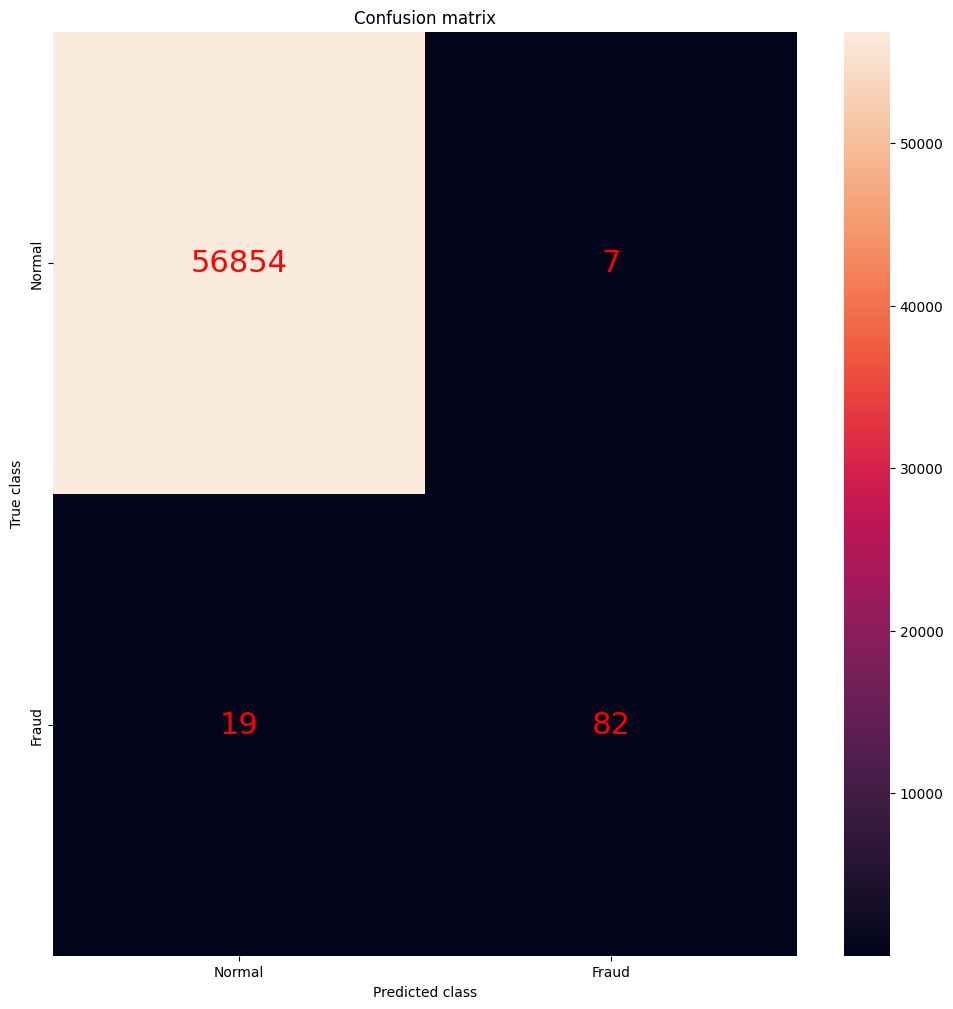

Accuracy: 0.9995435553526912
Precision: 0.9213483146067416
Recall Score: 0.8118811881188119
F1 Score: 0.8631578947368421
Confusion Matrix: [[56854     7]
 [   19    82]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Confusion matrix
LABELS = ["Normal", "Fraud"]


plt.figure(figsize=(12, 12))
akws = {"size": 22, "color":'r'}
sns.heatmap(confusion_matrix(Y_test, Y_pred), xticklabels=LABELS, yticklabels=LABELS, annot=True, annot_kws=akws, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.close()

print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred))
print('Recall Score:', recall_score(Y_test, Y_pred))
print('F1 Score:', f1_score(Y_test, Y_pred))
print('Confusion Matrix:', confusion_matrix(Y_test, Y_pred))

In [ ]:
pred_prob = rf.predict_proba(X_test)

mse = (pred_prob[:,1] >= 0.25).astype('int')

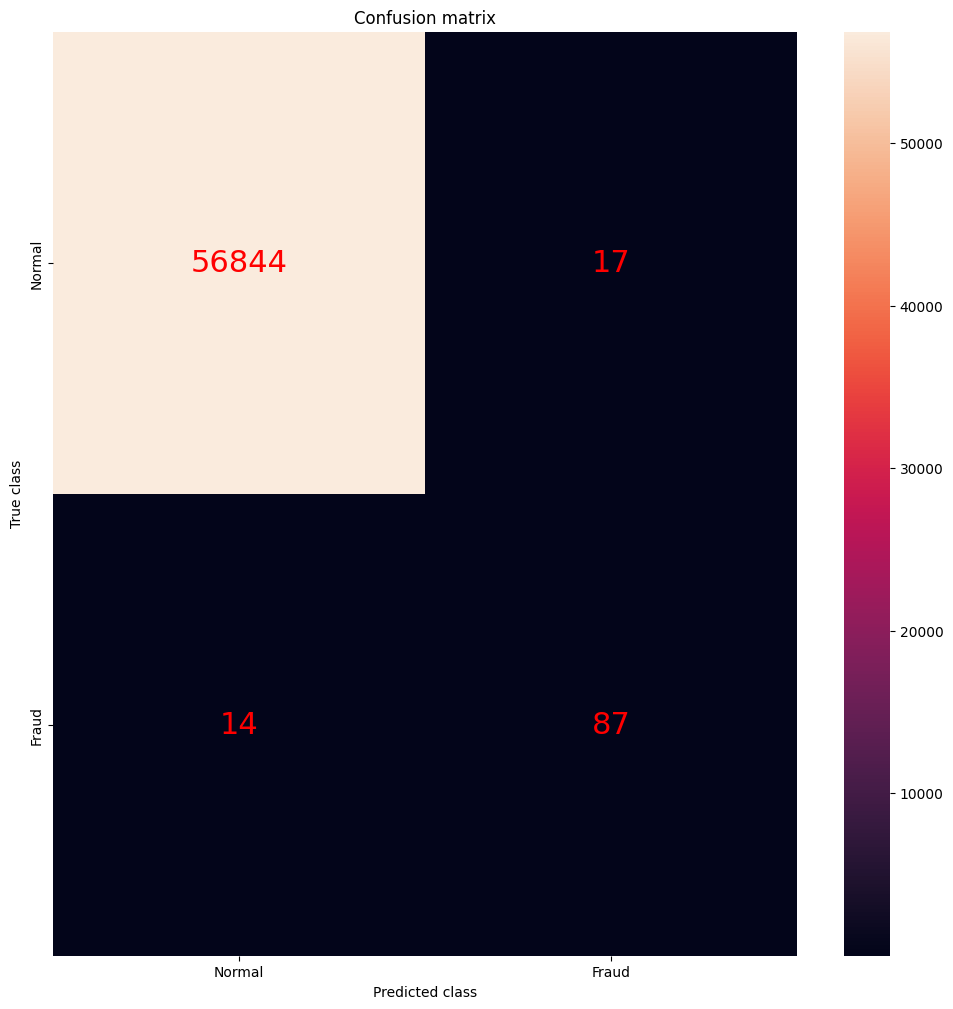

Accuracy: 0.9994557775359011
Precision: 0.8365384615384616
Recall Score: 0.8613861386138614
F1 Score: 0.848780487804878
Confusion Matrix: [[56844    17]
 [   14    87]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
LABELS = ["Normal", "Fraud"]


plt.figure(figsize=(12, 12))
akws = {"size": 22, "color":'r'}
sns.heatmap(confusion_matrix(Y_test, mse), xticklabels=LABELS, yticklabels=LABELS, annot=True, annot_kws=akws, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
plt.close()

print('Accuracy:', accuracy_score(Y_test, mse))
print('Precision:', precision_score(Y_test, mse))
print('Recall Score:', recall_score(Y_test, mse))
print('F1 Score:', f1_score(Y_test, mse))
print('Confusion Matrix:', confusion_matrix(Y_test, mse))

In [ ]:
features = data.drop('Class', axis = 1)
feature_list = list(features.columns)

In [ ]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: V17                  Importance: 0.29
Variable: V12                  Importance: 0.2
Variable: V14                  Importance: 0.16
Variable: V10                  Importance: 0.09
Variable: V4                   Importance: 0.05
Variable: V7                   Importance: 0.05
Variable: V26                  Importance: 0.04
Variable: Time                 Importance: 0.04
Variable: V3                   Importance: 0.04
Variable: V1                   Importance: 0.03


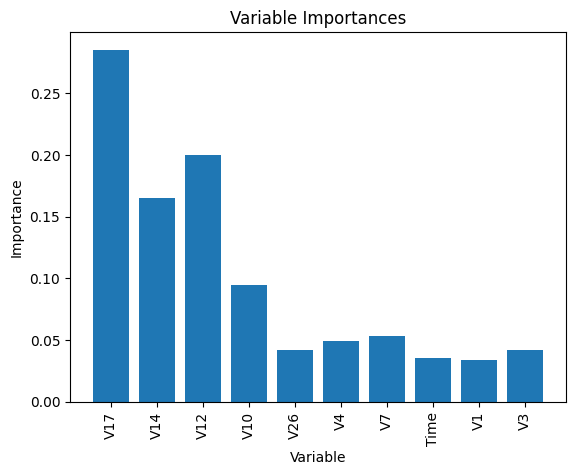

In [ ]:
import matplotlib.pyplot as plt

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')

plt.xticks(x_values, feature_list, rotation='vertical')

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 9.4 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(rf, X_train)

In [ ]:
shap_values = explainer.shap_values(X_train,check_additivity=False)

100%|===================| 455532/455690 [50:03<00:01]       

In [ ]:
type(shap_values)
shap_values

[array([[-8.59523684e-05,  3.07142854e-05,  3.23809474e-05, ...,
         -9.33333393e-05,  7.66666731e-05, -5.76190589e-05],
        [-5.83333225e-05,  1.18333327e-04, -4.33333460e-05, ...,
         -1.31666660e-04, -2.48333325e-04, -1.29999984e-04],
        [ 6.66664651e-06,  1.67380951e-04,  7.23809600e-05, ...,
          1.30714265e-04, -8.80952376e-04,  9.40476221e-05],
        ...,
        [-8.99999929e-05,  1.16666628e-04,  1.49999931e-05, ...,
         -4.66667168e-05, -3.83333365e-04,  9.16666610e-05],
        [ 4.31666712e-04,  2.08333274e-04, -1.00999995e-03, ...,
          5.73333222e-04, -7.41666674e-04,  9.16666607e-05],
        [-5.16666603e-05,  3.42857130e-05,  1.92857248e-05, ...,
         -6.66666590e-05,  7.59523798e-05, -6.07142987e-05]]),
 array([[ 8.59523832e-05, -3.07142863e-05, -3.23809529e-05, ...,
          9.33333344e-05, -7.66666685e-05,  5.76190493e-05],
        [ 5.83333339e-05, -1.18333335e-04,  4.33333329e-05, ...,
          1.31666668e-04,  2.48333336e

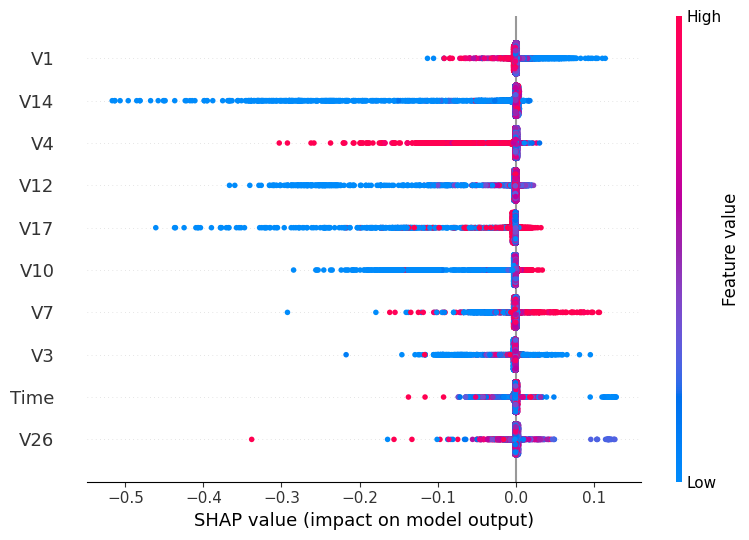

In [ ]:
shap.summary_plot(shap_values[0], X_train)

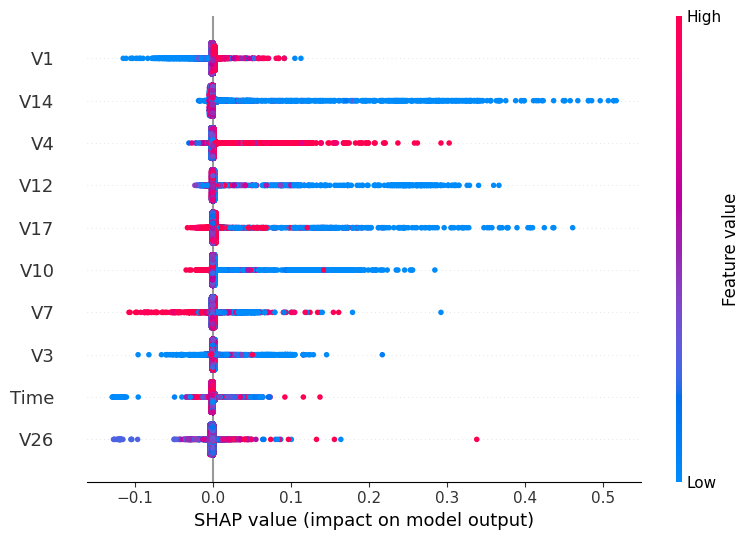

In [ ]:
shap.summary_plot(shap_values[1], X_train)

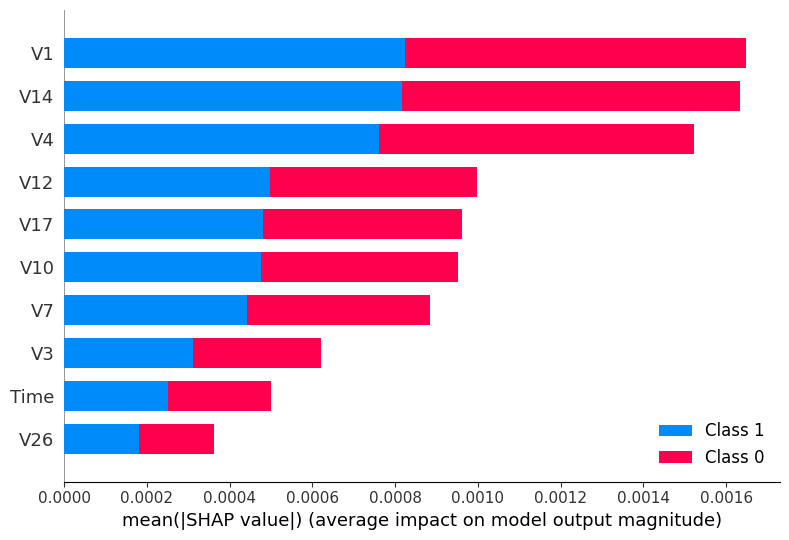

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

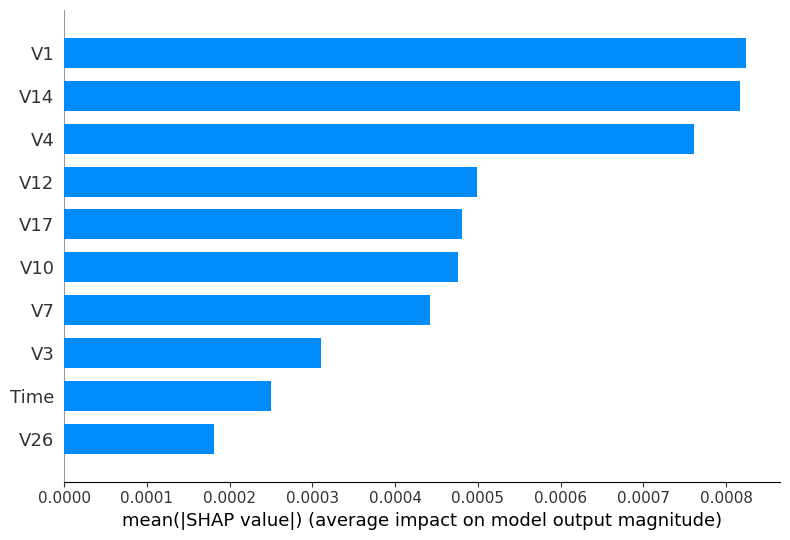

In [ ]:
shap.summary_plot(shap_values[0], X_train, plot_type="bar")

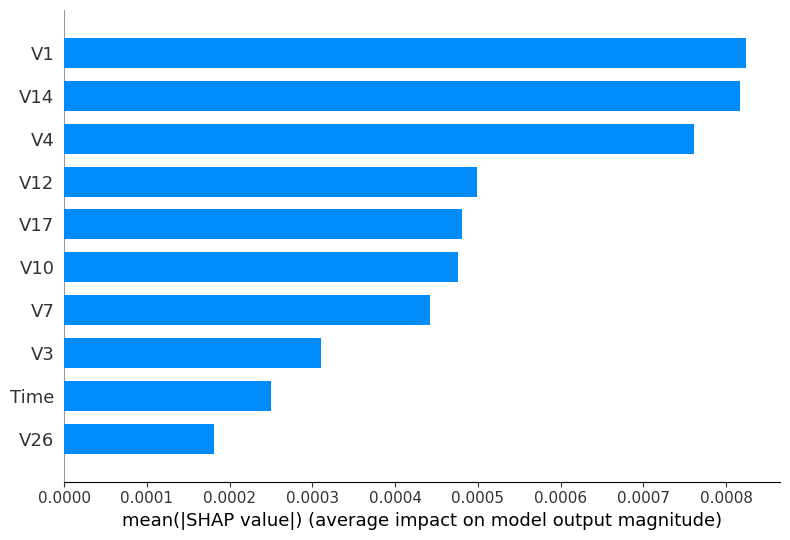

In [ ]:
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

In [ ]:
#explainer2 = shap.Explainer(rf)
#shap_val = explainer(X_train, check_additivity=False)
#shap.waterfall_plot(shap_val[0], max_display=10, show = True)

In [ ]:
#shap.plots.waterfall(shap_val[0,0], max_display=10, show = True)

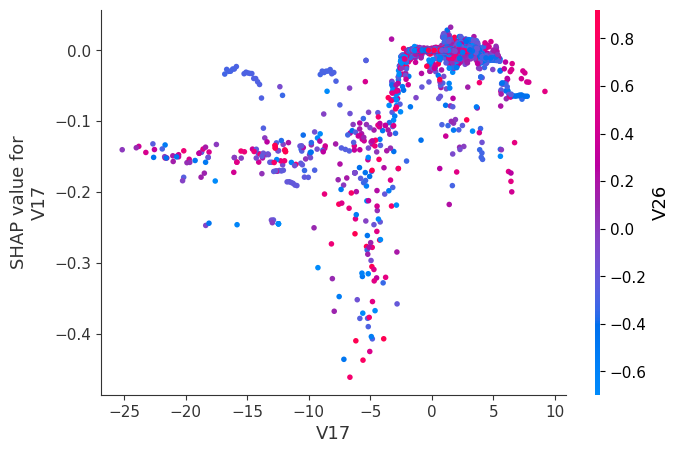

In [ ]:
shap.dependence_plot("V17", shap_values[0], X_train,interaction_index="V26")

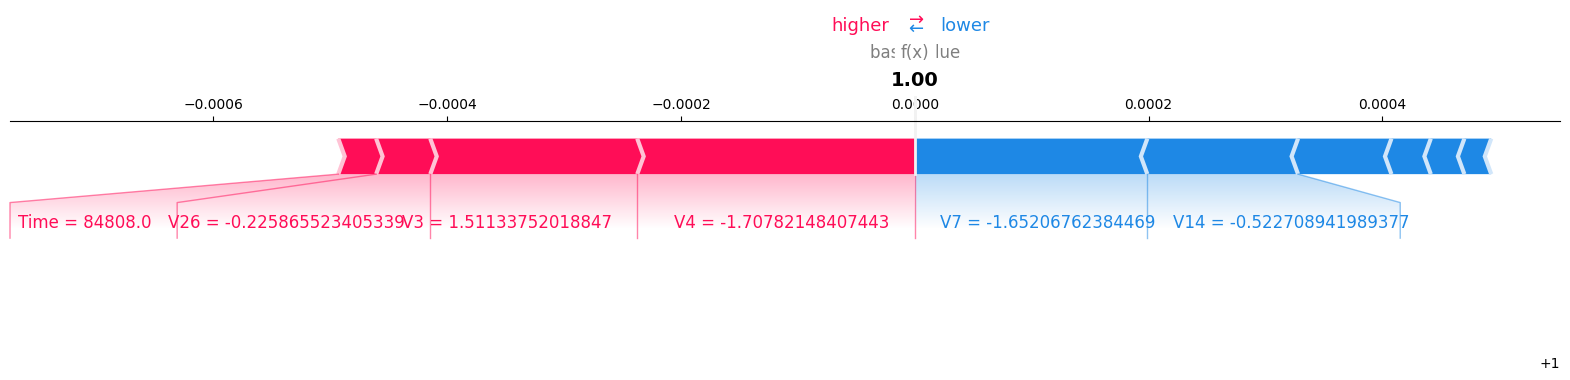

In [ ]:
shap.plots.force(explainer.expected_value[0], shap_values[0][123,:], X_train.iloc[123, :], matplotlib = True)

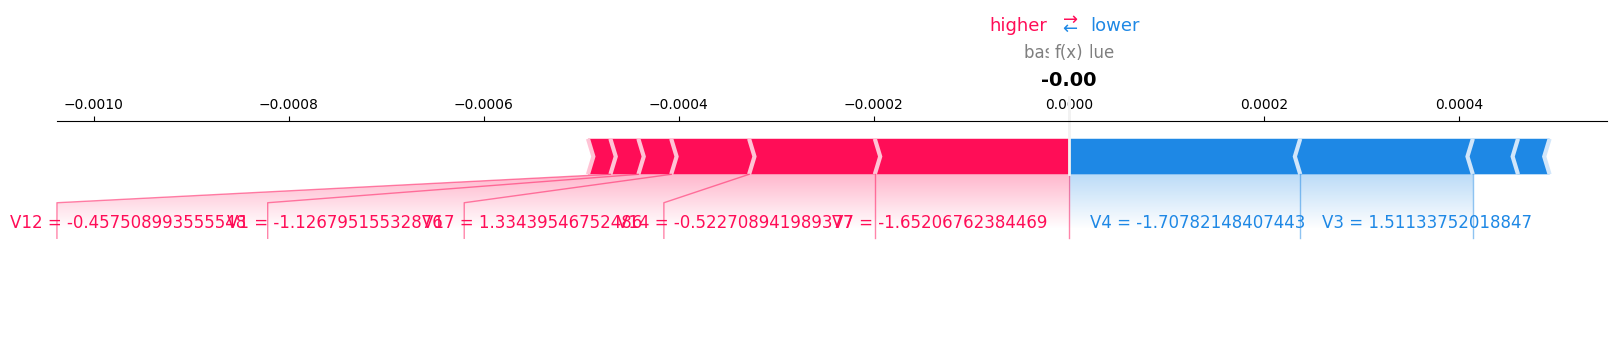

In [ ]:
shap.plots.force(explainer.expected_value[1], shap_values[1][123,:], X_train.iloc[123, :], matplotlib = True)

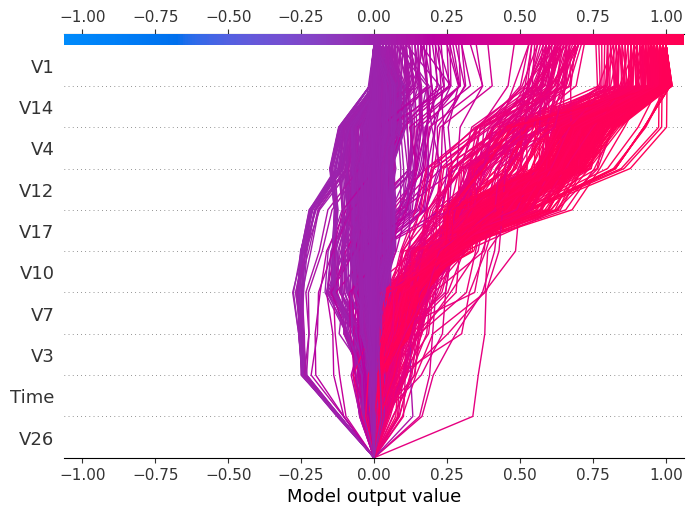

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns, ignore_warnings=True)